#### Os dados, até a data do presente estudo, estão no https://covid.saude.gov.br/
#### O presente arquivo é de 05 de maio. Atenção: de acordo com o dia em que for feita a análise, a última barra da totalização por semana estará menor.
#### Disclaimer/Aviso Legal: Este notebook tem um fim única e exclusivamente didático, para alunos da FATEC, como uma introdução à Análise de Dados Públicos. Desse modo, está excluída a garantia ou responsabilidade de qualquer tipo, por exemplo, de precisão, confiabilidade, completude e atualidade das informações.

In [1]:
import pandas as pd
low_memory=False
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
filename = r'C:\Users\fmasa\Downloads\HIST_PAINEL_COVIDBR_05mai2021.csv'
df = pd.read_csv(filename, delimiter=';',
                 error_bad_lines=False)

In [3]:
df.shape

(2276565, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2276565 entries, 0 to 2276564
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   regiao                  object 
 1   estado                  object 
 2   municipio               object 
 3   coduf                   int64  
 4   codmun                  float64
 5   codRegiaoSaude          float64
 6   nomeRegiaoSaude         object 
 7   data                    object 
 8   semanaEpi               int64  
 9   populacaoTCU2019        float64
 10  casosAcumulado          int64  
 11  casosNovos              int64  
 12  obitosAcumulado         int64  
 13  obitosNovos             int64  
 14  Recuperadosnovos        float64
 15  emAcompanhamentoNovos   float64
 16  interior/metropolitana  float64
dtypes: float64(6), int64(6), object(5)
memory usage: 295.3+ MB


In [5]:
df.sample(10)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
1189326,Sudeste,MG,Rio Preto,31,315590.0,31090.0,LIMA DUARTE,2020-09-29,40,5476.0,6,0,0,0,NaN,NaN,0.0
189697,Norte,TO,São Sebastião do Tocantins,17,172030.0,17002.0,BICO DO PAPAGAIO,2020-07-02,27,4805.0,20,0,0,0,NaN,NaN,0.0
1262872,Sudeste,MG,Vargem Bonita,31,317060.0,31093.0,PIUMHI,2020-04-18,16,2153.0,0,0,0,0,NaN,NaN,0.0
196839,Nordeste,MA,Afonso Cunha,21,210010.0,21005.0,CAXIAS,2021-03-16,11,6524.0,154,0,2,0,NaN,NaN,0.0
1031769,Sudeste,MG,Doresópolis,31,312340.0,31093.0,PIUMHI,2020-09-17,38,1527.0,47,0,0,0,NaN,NaN,0.0
2100900,Centro-Oeste,MS,Glória de Dourados,50,500400.0,50003.0,DOURADOS,2020-07-10,28,9965.0,38,4,1,0,NaN,NaN,0.0
2056500,Sul,RS,Sede Nova,43,432023.0,43013.0,REGIAO 13,2020-12-07,50,2907.0,29,0,1,0,NaN,NaN,0.0
1535461,Sudeste,SP,Restinga,35,354270.0,35081.0,TRES COLINAS,2020-05-12,20,7593.0,0,0,0,0,NaN,NaN,0.0
1183188,Sudeste,MG,Riachinho,31,315445.0,31058.0,UNAI,2020-07-28,31,8136.0,14,2,0,0,NaN,NaN,0.0
1250220,Sudeste,MG,Tapira,31,316810.0,31070.0,ARAXA,2021-02-20,7,4773.0,160,0,1,0,NaN,NaN,0.0


In [6]:
df.groupby('estado')['obitosAcumulado'].max().sort_values(ascending=False)

estado
SP    98710
RJ    45581
MG    34837
RS    25544
PR    23249
BA    18897
CE    18098
GO    15394
PE    14333
SC    13859
PA    13326
AM    12691
MT     9824
ES     9723
DF     7978
MA     7438
PB     6939
MS     5898
RN     5580
RO     5265
PI     5235
SE     4412
AL     4311
TO     2615
AP     1570
AC     1563
RR     1529
Name: obitosAcumulado, dtype: int64

<AxesSubplot:ylabel='estado'>

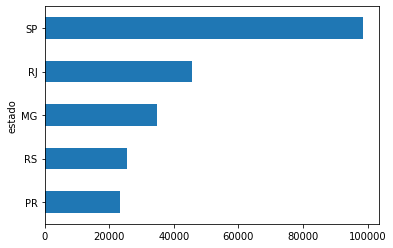

In [7]:
df.groupby('estado')['obitosAcumulado'].max().sort_values().tail(5).plot(kind='barh')

<AxesSubplot:xlabel='data'>

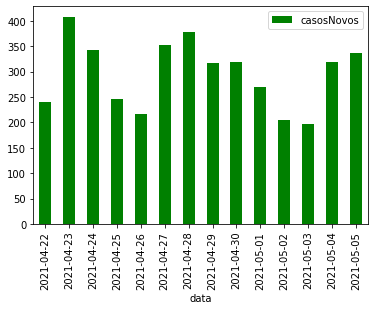

In [8]:
sjc = df.query('municipio == "São José dos Campos"')
sjc.tail(14).plot(kind='bar', 
        x='data', y='casosNovos', color='GREEN')

<AxesSubplot:xlabel='semanaEpi'>

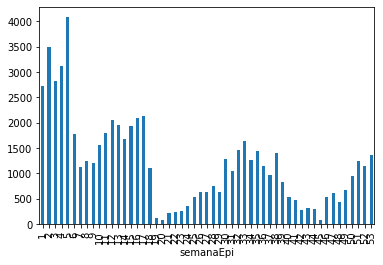

In [9]:
sjc.groupby('semanaEpi')['casosNovos'].sum().plot(kind='bar')

<AxesSubplot:xlabel='data'>

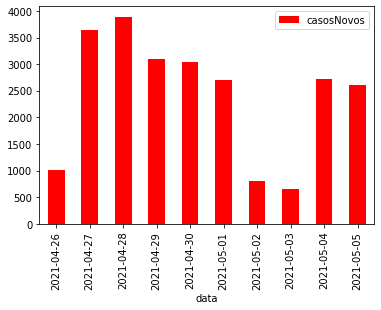

In [10]:
sp = df.query('municipio == "São Paulo"')
sp.tail(10).plot(kind='bar', 
        x='data', y='casosNovos', color='RED')

<AxesSubplot:xlabel='semanaEpi'>

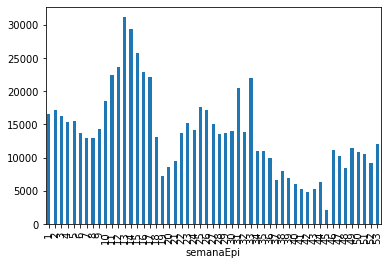

In [11]:
sp.groupby('semanaEpi')['casosNovos'].sum().plot(kind='bar')